In [43]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_excel("height-width.xlsx")

In [44]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [45]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [46]:
x=df[['Weight']]

In [47]:
x.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [48]:
y=df['Height']

In [49]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=42)

In [51]:
xtrain.head()

,Weight
1374,214.370580
231,201.528177
1769,191.065448
1812,197.646409
2658,213.683943


In [52]:
xtest.head()

,Weight
211,193.346560
1454,182.898115
2176,175.832447
912,228.707301
921,217.561415


In [53]:
ytrain.head()

1374    75.155410
231     71.968306
1769    69.963912
1812    66.475562
2658    72.731788
Name: Height, dtype: float64

In [54]:
ytest.head()

211     70.324753
1454    67.271615
2176    69.142273
912     77.160801
921     72.676961
Name: Height, dtype: float64

In [55]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [56]:
reg.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
m=reg.coef_

In [58]:
m

array([0.12299984])

In [59]:
c=reg.intercept_

In [60]:
c

np.float64(46.056754939445085)

In [86]:
reg.predict([[214.370580]])

array([72.42430246])

In [84]:
pred=reg.predict(xtrain)

In [85]:
pred

array([72.42430252, 70.84468896, 69.55777484, ..., 67.91626218,
       68.12130509, 66.5856149 ], shape=(2450,))

In [64]:
pred1=reg.predict(xtest)

In [65]:
pred1

array([69.83835135, 68.55319428, 67.68411813, ..., 64.24865547,
       67.8738529 , 66.34350121], shape=(1051,))

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
mae=mean_absolute_error(ytrain,pred)

In [68]:
mae

1.173061338187983

In [69]:
mse=mean_squared_error(ytrain,pred)

In [70]:
mse

2.2199313189684933

In [71]:
mae_test=mean_absolute_error(ytest,pred1)

In [72]:
mae_test

1.1830969282830224

In [73]:
mse_test=mean_squared_error(ytest,pred1)

In [74]:
mse_test

2.1095949761277595

In [75]:
r2_score(ytrain,pred)

0.7319633347457271

In [76]:
r2_score(ytest,pred1)

0.7331268600555375

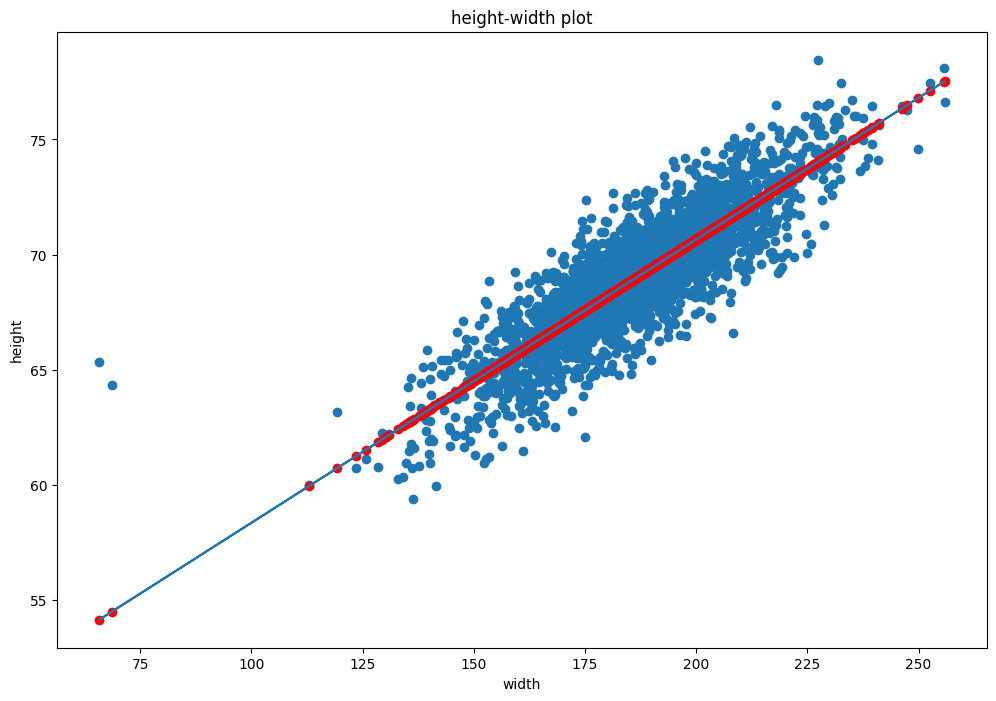

In [77]:
plt.figure(figsize=(12,8))
plt.xlabel("width")
plt.ylabel("height")
plt.title("height-width plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color='red')

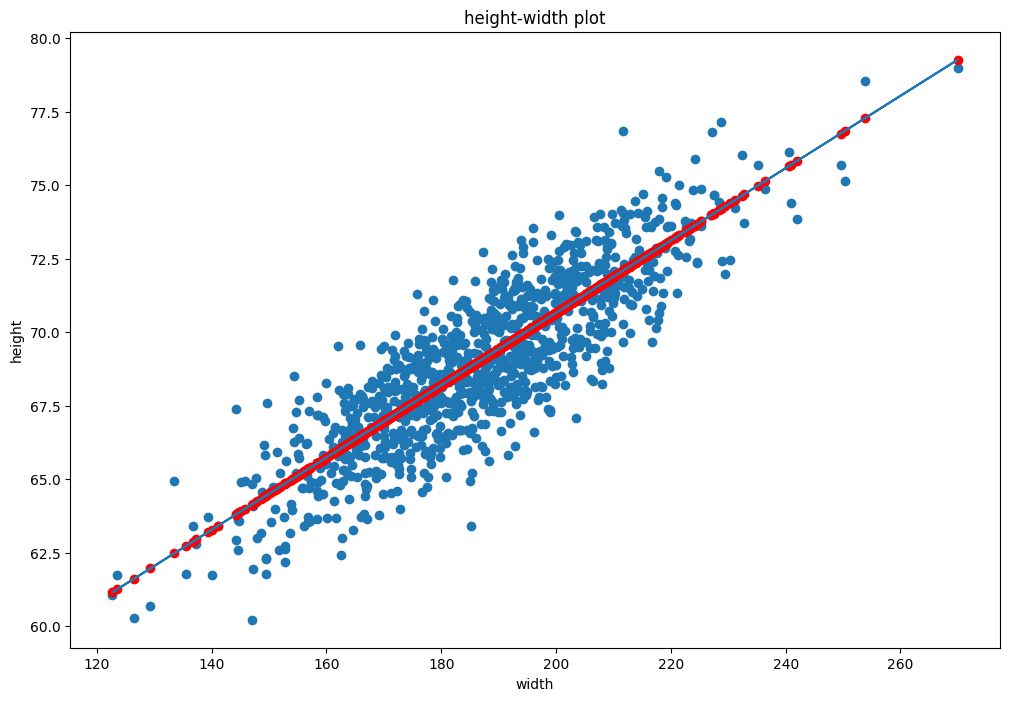

In [78]:
plt.figure(figsize=(12,8))
plt.xlabel("width")
plt.ylabel("height")
plt.title("height-width plot")
plt.scatter(xtest,ytest)
plt.plot(xtest,reg.predict(xtest))
plt.scatter(xtest,reg.predict(xtest),color='red')

In [79]:
import pickle as pk
import joblib as jb

In [80]:
pk.dump(reg,open("first","wb"))

In [87]:
reg2=pk.load(open("first","rb"))
reg2.predict([[214.370580]])

array([72.42430246])

In [82]:
jb.dump(reg,open("second","wb"))